In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

In [80]:
csv_data = pd.read_csv("data/weatherdata/temp_data_features.csv")[:330].loc[0::2]

In [81]:
csv_data

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average,Odd/Even
0,1850,-1.941,0.552,-0.742,-0.745,-0.540,0.364,0.570,0.596,-0.225,-0.623,-0.120,-0.013,-0.239,NaN
2,1851,0.392,-0.056,-0.906,-0.318,-0.073,0.123,0.040,0.237,0.387,0.447,-0.306,-0.016,-0.004,NaN
4,1852,-0.283,-0.265,-0.799,-1.209,0.088,0.277,0.265,0.156,0.214,-0.342,-0.420,0.679,-0.137,NaN
6,1853,0.650,-0.478,-0.940,-0.733,-0.056,-0.224,0.328,0.320,-0.573,-0.161,-0.933,-1.110,-0.326,NaN
8,1854,-0.394,-0.313,0.000,-0.644,-0.146,-0.165,0.690,0.248,-0.127,0.214,-0.759,0.022,-0.125,NaN
10,1855,-0.370,-1.737,-0.909,0.140,0.127,-0.223,0.107,-0.072,-0.402,-0.219,-0.661,-2.042,-0.522,NaN
12,1856,-0.137,-0.831,-1.479,-0.392,-0.799,0.479,-0.335,-0.377,-0.652,-0.779,-1.424,-0.318,-0.587,NaN
14,1857,-1.074,0.029,-0.822,-1.699,-1.196,-0.382,-0.178,0.022,-0.493,-0.739,-0.859,0.426,-0.580,NaN
16,1858,-0.003,-1.454,-0.913,-0.401,-0.556,0.026,-0.324,-0.284,-0.264,-0.222,-1.852,-0.414,-0.555,NaN
18,1859,-0.195,0.129,-0.120,-0.256,-0.053,-0.127,0.224,0.101,-0.473,-0.094,-0.396,-1.054,-0.193,NaN


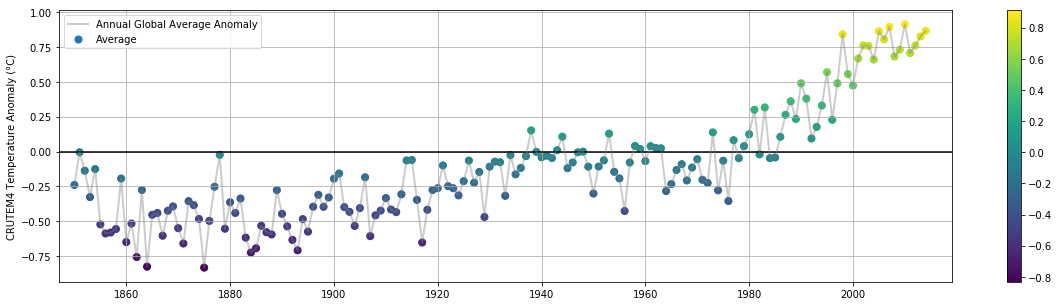

In [82]:
plt.figure(figsize=(20,5))
plt.scatter(x=csv_data["Year"], y=csv_data["Average"], marker="o", s=50, c=csv_data["Average"])
plt.plot(csv_data["Year"], csv_data["Average"], label="Annual Global Average Anomaly", alpha=0.4, linewidth=2, c="grey")
plt.hlines(0,min(csv_data["Year"])-3,max(csv_data["Year"])+5)

plt.legend(loc="best")
plt.xlim(min(csv_data["Year"])-3, max(csv_data["Year"])+5)
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.colorbar()
plt.grid()
plt.show()

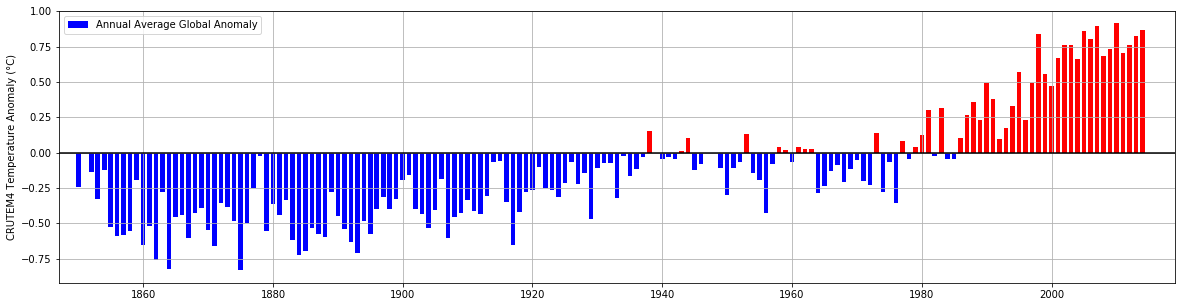

In [83]:
plt.figure(figsize=(20,5))
plt.bar(
    csv_data["Year"],
    csv_data["Average"],
    width=0.7,
    edgecolor="none",
    color=(csv_data["Average"]>0).map({True: 'r', False: 'b'}),
    label="Annual Average Global Anomaly",
    )
plt.hlines(0,min(csv_data["Year"])-3,max(csv_data["Year"])+5)
plt.legend(loc="best")
plt.xlim(min(csv_data["Year"])-3, max(csv_data["Year"])+5)
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.grid()
plt.show()

In [84]:
# Final Record is not complete so average of the last year is not reliable
csv_data[-1:]

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Average,Odd/Even
328,2014,0.944,0.481,0.962,1.04,0.919,0.891,0.713,0.835,0.819,0.973,0.72,1.096,0.866,NaN


In [85]:
# Prepare monthly data
monthly_temp = csv_data.drop("Year", 1).drop("Average", 1)#.drop("TSI", 1).drop("CO2", 1).drop("CH4", 1)
monthly_temp = pd.Series(np.ravel(monthly_temp)).dropna()
month_index = list((monthly_temp.index/12.) + 1851)

In [86]:
min(monthly_temp), max(monthly_temp)

(-2.218, 1.6230000000000002)

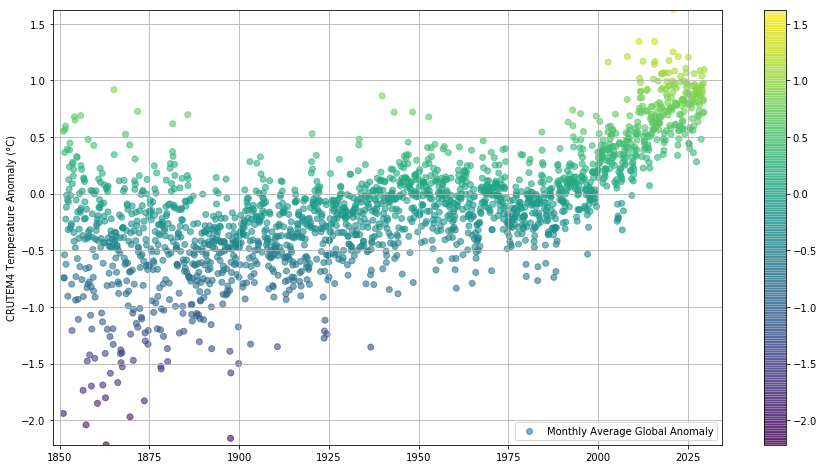

In [87]:
plt.figure(figsize=(15,8))
plt.scatter(
    x=month_index,
    y=monthly_temp,
    marker="o",
    label="Monthly Average Global Anomaly",
    c=monthly_temp,
    alpha=0.6
    )
plt.colorbar()
plt.legend(loc="lower right")
plt.xlim(min(month_index)-3,max(month_index)+5)
plt.ylim(min(monthly_temp),max(monthly_temp))
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.grid()
plt.show()

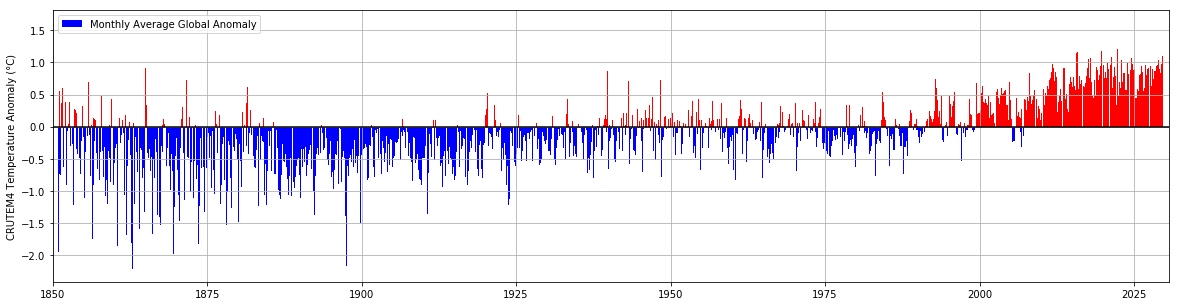

In [88]:
plt.figure(figsize=(20,5))
plt.bar(month_index, monthly_temp,  width=0.1, edgecolor="none", color=(monthly_temp>0).map({True: 'r', False: 'b'}),
        label="Monthly Average Global Anomaly")
plt.hlines(0,min(month_index)-1,max(month_index)+1)
plt.legend(loc="best")
plt.xlim(min(month_index)-1, max(month_index)+1)
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.grid()
plt.show()

# Linear Regression
## Predicting Annual Temperature

In [89]:
annual_temp = csv_data["Average"].fillna(0)
annual_index = list(csv_data["Year"].values)
annual_index_feature = list(csv_data[["Year"]].values)
prediction_annual_index = [[item] for item in range(min(annual_index_feature)[0], max(annual_index_feature)[0]+10)]

Coefficients: [0.00689532]
Residual sum of squares: 0.05
Variance score: 0.67


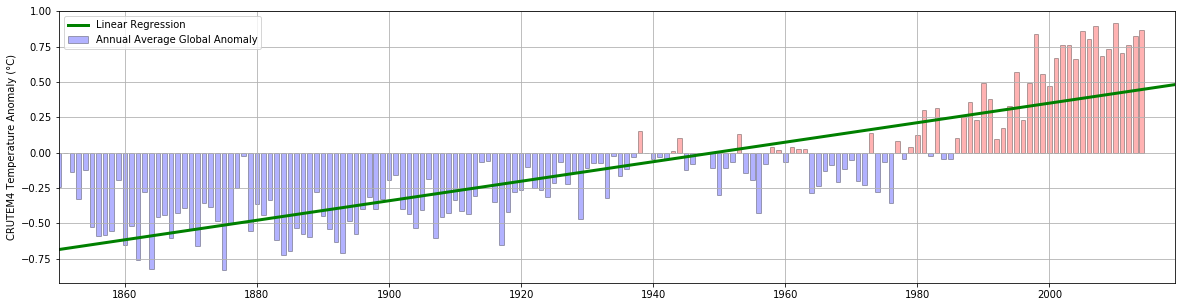

In [90]:
# Code source: Jaques Grobler
# License: BSD 3 clause

from sklearn import linear_model


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(annual_index_feature, annual_temp)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(annual_index_feature) - annual_temp) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(annual_index_feature, annual_temp))

# Plot outputs
plt.figure(figsize=(20,5))
plt.bar(annual_index, annual_temp,  width=0.7, edgecolor="none", color=(annual_temp>0).map({True: 'r', False: 'b'}),
        label="Annual Average Global Anomaly", alpha=0.3)

plt.plot(prediction_annual_index[:], regr.predict(prediction_annual_index[:]), color='green',
        linewidth=3, alpha=1.0, label="Linear Regression")

plt.grid()
plt.xlim(np.min(annual_index_feature), np.max(annual_index_feature)+5)
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.legend(loc="best")
plt.show()

# Predicting Monthly Temperature

In [91]:
month_index_feature = [[item] for item in month_index]
prediction_month_index = [[item[0] + 5] for item in month_index_feature]

Coefficients: [0.00636491]
Residual sum of squares: 0.14
Variance score: 0.43


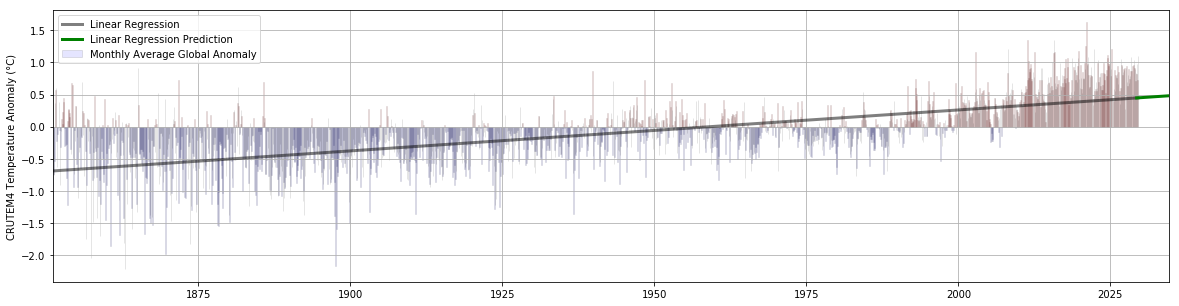

In [92]:
# Code source: Jaques Grobler
# License: BSD 3 clause

from sklearn import linear_model

regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(month_index_feature, monthly_temp)

# The coefficients
print('Coefficients:', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(month_index_feature) - monthly_temp) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(month_index_feature, monthly_temp))

# Plot outputs
plt.figure(figsize=(20,5))
plt.bar(month_index, monthly_temp,  width=0.1, edgecolor="none", color=(monthly_temp>0).map({True: 'r', False: 'b'}),
        label="Monthly Average Global Anomaly", alpha=0.1)

plt.plot(month_index, regr.predict(month_index_feature), color='black',
        linewidth=3, alpha=0.5, label="Linear Regression")
plt.plot(prediction_month_index[-5*12:], regr.predict(prediction_month_index[-5*12:]), color='green',
        linewidth=3, alpha=1.0, label="Linear Regression Prediction")

plt.grid()
plt.xlim(np.min(month_index_feature), np.max(month_index_feature)+5)
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.legend(loc="best")
plt.show()

# SVM Regression

Residual sum of squares: 0.02
score1: 0.87
score2: 0.84
score3: 0.84


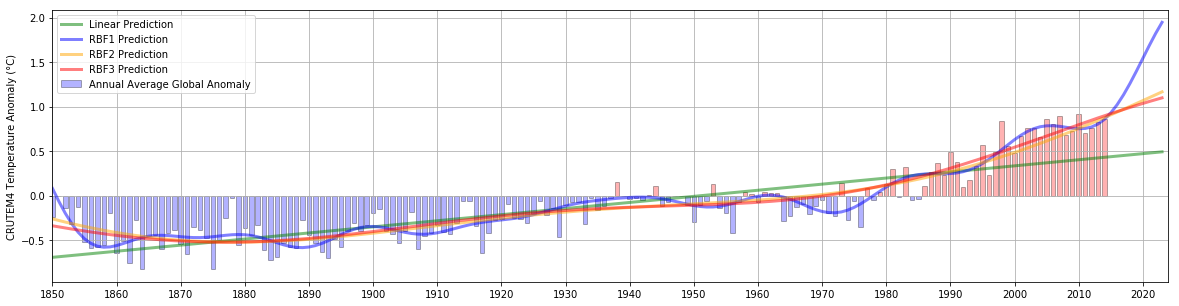

In [93]:
from sklearn.svm import SVR

# Create linear regression object
regr_linear = SVR(kernel="linear")
regr_rbf_1 = SVR(kernel="rbf", C=100.0, gamma=0.004, epsilon=0.01)
regr_rbf_2 = SVR(kernel="rbf", C=10.0, gamma=0.0001, epsilon=0.01)
regr_rbf_3 = SVR(kernel="rbf", C=1.0, gamma=0.0002, epsilon=0.1)

# Train the model using the training sets
regr_linear.fit(annual_index_feature, annual_temp)
regr_rbf_1.fit(annual_index_feature, annual_temp)
regr_rbf_2.fit(annual_index_feature, annual_temp)
regr_rbf_3.fit(annual_index_feature, annual_temp)


# The coefficients
#print 'Coefficients:', regr.coef_
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr_rbf_1.predict(annual_index_feature) - annual_temp) ** 2))
# Explained variance score: 1 is perfect prediction
print('score1: %.2f' % regr_rbf_1.score(annual_index_feature, annual_temp))
print('score2: %.2f' % regr_rbf_2.score(annual_index_feature, annual_temp))
print('score3: %.2f' % regr_rbf_3.score(annual_index_feature, annual_temp))

# Plot outputs
plt.figure(figsize=(20,5))
plt.bar(annual_index, annual_temp,  width=0.7, edgecolor="none", color=(annual_temp>0).map({True: 'r', False: 'b'}),
        label="Annual Average Global Anomaly", alpha=0.3)

plt.plot(prediction_annual_index[:], regr_linear.predict(prediction_annual_index[:]), color='green',
        linewidth=3, alpha=0.5, label="Linear Prediction")
plt.plot(prediction_annual_index[:], regr_rbf_1.predict(prediction_annual_index[:]), color='blue',
        linewidth=3, alpha=0.5, label="RBF1 Prediction")
plt.plot(prediction_annual_index[:], regr_rbf_2.predict(prediction_annual_index[:]), color='orange',
        linewidth=3, alpha=0.5, label="RBF2 Prediction")
plt.plot(prediction_annual_index[:], regr_rbf_3.predict(prediction_annual_index[:]), color='red',
        linewidth=3, alpha=0.5, label="RBF3 Prediction")

plt.grid()
plt.xlim(np.min(annual_index_feature), np.max(annual_index_feature)+10)
plt.xticks(np.arange(np.min(annual_index_feature), np.max(annual_index_feature)+10, 10))
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.legend(loc="best")
plt.show()

In [94]:
from sklearn.svm import SVR
from sklearn.grid_search import GridSearchCV

regr_rbf = SVR(kernel="rbf")
C = [100, 10, 1]
gamma = [0.005, 0.004, 0.003, 0.002, 0.001]
epsilon=[0.01]
parameters = {"C":C, "gamma":gamma, "epsilon":epsilon}

gs = GridSearchCV(regr_rbf, parameters, scoring="r2")

gs.fit(annual_index_feature, annual_temp)

print("Best Estimator:\n%s"  % gs.best_estimator_)

Best Estimator:
SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.001,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [95]:
from sklearn.grid_search import GridSearchCV

regr_rbf = SVR(kernel="rbf")
C = np.arange(gs.best_estimator_.C * 0.9, gs.best_estimator_.C * 1.1, gs.best_estimator_.C * 0.01)
gamma = np.arange(gs.best_estimator_.gamma * 0.9, gs.best_estimator_.gamma * 1.1, gs.best_estimator_.gamma * 0.01)
parameters = {"C":C, "gamma":gamma}

gs = GridSearchCV(regr_rbf, parameters, scoring="r2")

gs.fit(annual_index_feature, annual_temp)

print("Best Estimator:\n%s"  % gs.best_estimator_)

Best Estimator:
SVR(C=0.93, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma=0.0009000000000000001, kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


Residual sum of squares: 0.02
score: 0.86


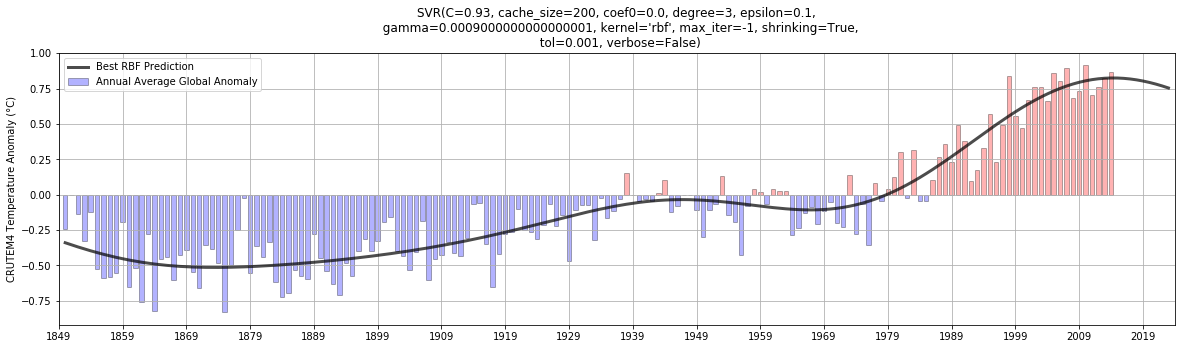

In [96]:
from sklearn.svm import SVR

# Create linear regression object
regr_rbf = gs.best_estimator_


# The coefficients
#print 'Coefficients:', regr.coef_
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr_rbf.predict(annual_index_feature) - annual_temp) ** 2))
# Explained variance score: 1 is perfect prediction
print('score: %.2f' % regr_rbf.score(annual_index_feature, annual_temp))

# Plot outputs
plt.figure(figsize=(20,5))
plt.bar(annual_index, annual_temp,  width=0.7, edgecolor="none", color=(annual_temp>0).map({True: 'r', False: 'b'}),
        label="Annual Average Global Anomaly", alpha=0.3)


plt.plot(prediction_annual_index[:], regr_rbf.predict(prediction_annual_index[:]), color='black',
        linewidth=3, alpha=0.7, label="Best RBF Prediction")

plt.grid()
plt.title(regr_rbf)
plt.xlim(np.min(annual_index_feature)+1, np.max(annual_index_feature)+10)
plt.xticks(np.arange(np.min(annual_index_feature)-1, np.max(annual_index_feature)+10, 10))
plt.ylabel(u"CRUTEM4 Temperature Anomaly (\u00B0C)")
plt.legend(loc="best")
plt.show()